#### Name: Eric Lindgren
#### CID: ericlin
#### PSN: 970222-1954

## Gaussian process regression

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import GPy
%matplotlib inline

### Task 1

In [5]:
# Load experimental data sample
z_sample, mu_sample, dmu = np.loadtxt('cosmology_sample.dat',unpack=True)

# data must be two-dimensional for GPy
x = z_sample.reshape((-1,1))
y = mu_sample.reshape((-1,1))
print('The experimental data is of shape:', y.shape)

# Load true function
z, mu_true = np.loadtxt('cosmology_true.dat',unpack=True)

print('The true function data is of shape:', mu_true.shape)

The experimental data is of shape: (100, 1)
The true function data is of shape: (1000,)


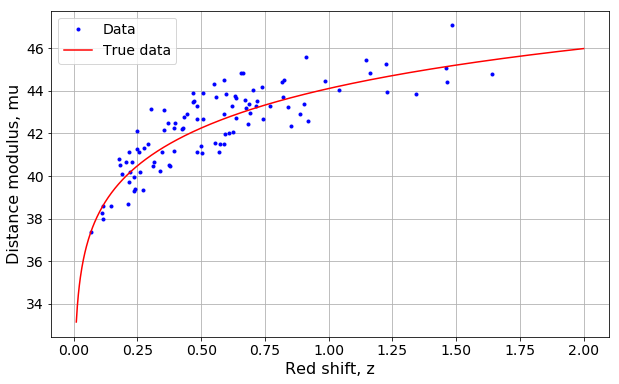

In [13]:
# Plot the data
# Set plot params
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y, 'b.', label='Data')
# Plot true data as well
ax.plot(z, mu_true, 'r', label="True data")

ax.set_xlabel("Red shift, z")
ax.set_ylabel("Distance modulus, mu")
ax.set_title("")
plt.grid()
plt.legend(loc="best")

#### Task 2

In [20]:
# Create model

# First, define an exponentiated quadratic covariance function
k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

# Second, use this covariance function to create a model for our data
model_2 = GPy.models.GPRegression(x,y,k)

In [22]:
# Print hyperparameters of kernel before optimization
print(model)


Name : GP regression
Objective : 1316.1261625137322
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [25]:
# Optimize model to data using GPy
model_2.constrain_positive()  # Constrain our variances to be positive.
model_2.optimize()

reconstraining parameters GP_regression


In [26]:
# Print optimized parameters
print(model_2)


Name : GP regression
Objective : 152.57170381374746
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1000.2044403162004  |      +ve      |        
  rbf.lengthscale          |  3.0174646003536165  |      +ve      |        
  Gaussian_noise.variance  |  1.0005767169893196  |      +ve      |        


The Gaussian noise variance is approximately one. This is the same as the defualt value of this parameter for our model, which means that either our data wasn't sufficient to optimize this parameter, or the variance of the data is around 1. The latter seems reasonable, since the datapoints are distributed in a band approximately equal to $y = y_{true} \pm 2$, which would correspond to $\pm 2\sigma$. 

In [28]:
# Calculate log likelihood of the data using this model
log_like = model_2.log_likelihood()
print(f'The log likelihood of the model is: {log_like:.2f}.')

The log likelihood of the model is: -152.57.


{'dataplot': [<matplotlib.collections.PathCollection at 0x184219347f0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x184218f9da0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x18421934b70>]}

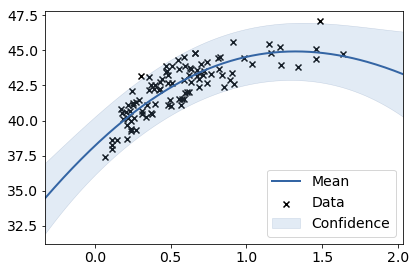

In [30]:
# Plot the model and data
model_2.plot()  # Plots data and 95% confidence region

#### Task 3

reconstraining parameters GP_regression


Model before optimization: 
Name : GP regression
Objective : 152.23492965367768
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |   value  |  constraints  |  priors
  rbf.variance             |  1000.0  |      +ve      |        
  rbf.lengthscale          |     1.2  |      +ve      |        
  Gaussian_noise.variance  |     1.0  |      +ve      |        
************************************************
Optimized model: 
Name : GP regression
Objective : 151.91353925119773
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1000.0000119807419  |      +ve      |        
  rbf.lengthscale          |   1.436231038796533  |      +ve      |        
  Gaussian_noise.variance  |  0.9253990430423037  |      +ve      |        
The log likelihood of model for task 3 is: -151.91.


{'dataplot': [<matplotlib.collections.PathCollection at 0x1842430aa20>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1842430a978>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1842430af60>]}

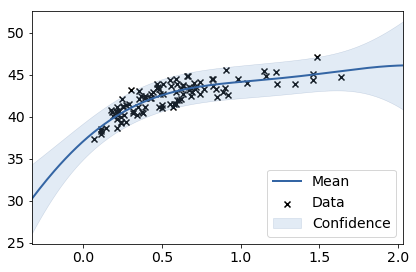

In [34]:
# Redo analysis, but initialize with different parameters.

k = GPy.kern.RBF(input_dim=1, variance=1000., lengthscale=1.2)
model_3 = GPy.models.GPRegression(x,y,k)
print(f'Model before optimization: {model_3}')
print('************************************************')
# Optimize model to data using GPy
model_3.constrain_positive()  # Constrain our variances to be positive.
model_3.optimize()
print(f'Optimized model: {model_3}')

log_like = model_3.log_likelihood()
print(f'The log likelihood of model for task 3 is: {log_like:.2f}.')

model_3.plot()  # Plots data and 95% confidence region

We note that the fit to the data points are much better in the case of a slightly longer timescale and higher variance (Task 3). Also, the error band widens much more noticeably outside the data interval which is more hones,t and finally we see that the mean for task 3 is much more in line with the true data $y_{true}$.

In task 3, we initialize the kernel with a much larger variance. This leads to **TODO**